# Neural Network for Binary Classification: Pima Indians Diabetes Prediction

## Overview
Build a neural network to predict diabetes from clinical measurements using the Pima Indians Diabetes dataset.

**Expected accuracy: 70-75%** on test data.

## Learning Objectives
- Load and explore the Pima Indians Diabetes dataset from an online source
- Preprocess data (scaling, train-test split)
- Design and train a neural network
- Evaluate performance using various metrics
- Generate visualizations (training curves, confusion matrix)

In [66]:
# Set random seeds for reproducible results
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Data processing and visualization
import numpy as np                           # Numerical computing
import pandas as pd                          # Data manipulation
from sklearn.model_selection import train_test_split  # Split data into train/test
from sklearn.preprocessing import StandardScaler    # Scale features (normalize values)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score  # Evaluation metrics

# Deep learning
from tensorflow.keras import models, layers  # Build neural network
from tensorflow.keras.optimizers import Adam  # Optimizer for training
from tensorflow.keras.callbacks import EarlyStopping  # Stop training when validation loss plateaus

# Visualization
import matplotlib.pyplot as plt              # Plot training curves and results
import seaborn as sns                        # Enhanced visualizations

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 1. Load Pima Indians Diabetes Dataset

**Source**: Kaggle - UCI Machine Learning Repository  
**URL**: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database  
**Samples**: 768 patients (all female, Pima Indian heritage, age 21+)  
**Features**: 8 clinical measurements  
**Target**: Diabetes diagnosis (0=No, 1=Yes)  
**Challenge**: ~70-75% max accuracy (harder than Heart Disease!)

**Instructions**: Download `diabetes.csv` from Kaggle and place it in this folder.

In [67]:
# Load the Pima Indians Diabetes dataset from Kaggle
# Download from: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
# Place diabetes.csv in this folder

print("Loading Pima Indians Diabetes dataset...")
data = pd.read_csv('diabetes.csv')

print(f"Dataset loaded successfully!")
print(f"Total samples: {data.shape[0]}")

# Display column names from the dataset
print(f"\nColumn names: {list(data.columns)}")

# Extract features (X) and labels (y)
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Get feature names for reference
feature_names = list(data.columns[:-1])
target_names = np.array(['No Diabetes', 'Diabetes'])

print(f"\nFeatures shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Feature names: {feature_names}")
print(f"Target classes: {target_names}")

Loading Pima Indians Diabetes dataset...
Dataset loaded successfully!
Total samples: 768

Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Features shape: (768, 8)
Labels shape: (768,)
Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target classes: ['No Diabetes' 'Diabetes']


In [68]:
# Explore the dataset structure
print("=" * 70)
print("PIMA INDIANS DIABETES DATASET EXPLORATION")
print("=" * 70)

print(f"\nTotal samples: {X.shape[0]}")
print(f"Total features: {X.shape[1]}")

print(f"\nFeatures represent clinical measurements:")
print(f"  • Pregnancies: Number of times pregnant")
print(f"  • Glucose: Plasma glucose concentration")
print(f"  • BloodPressure: Diastolic blood pressure (mm Hg)")
print(f"  • SkinThickness: Triceps skin fold thickness (mm)")
print(f"  • Insulin: 2-Hour serum insulin (mu U/ml)")
print(f"  • BMI: Body mass index")
print(f"  • DiabetesPedigreeFunction: Genetic diabetes risk factor")
print(f"  • Age: Age in years")

print(f"\nClass Distribution:")
print(f"  No Diabetes (0): {np.sum(y == 0)} samples ({100*np.sum(y==0)/len(y):.1f}%)")
print(f"  Diabetes (1): {np.sum(y == 1)} samples ({100*np.sum(y==1)/len(y):.1f}%)")

print(f"\nFeature Value Ranges:")
print(f"  Min values: {X.min(axis=0)}")
print(f"  Max values: {X.max(axis=0)}")
print(f"  Note: Features have very different scales → MUST normalize!")

print(f"\nFirst 5 patients sample:")
print(data.head())

PIMA INDIANS DIABETES DATASET EXPLORATION

Total samples: 768
Total features: 8

Features represent clinical measurements:
  • Pregnancies: Number of times pregnant
  • Glucose: Plasma glucose concentration
  • BloodPressure: Diastolic blood pressure (mm Hg)
  • SkinThickness: Triceps skin fold thickness (mm)
  • Insulin: 2-Hour serum insulin (mu U/ml)
  • BMI: Body mass index
  • DiabetesPedigreeFunction: Genetic diabetes risk factor
  • Age: Age in years

Class Distribution:
  No Diabetes (0): 500 samples (65.1%)
  Diabetes (1): 268 samples (34.9%)

Feature Value Ranges:
  Min values: [ 0.     0.     0.     0.     0.     0.     0.078 21.   ]
  Max values: [ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]
  Note: Features have very different scales → MUST normalize!

First 5 patients sample:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66      

## 2. Data Preprocessing

**Steps**:
1. Split data: 80% training, 20% testing
2. Scale features to mean=0, std=1 (StandardScaler)
3. Fit scaler only on training data (prevent data leakage)

In [69]:
# Step 1: Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% for testing
    random_state=42,         # For reproducibility
    stratify=y               # Keep class distribution in both sets
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(f"  No Diabetes: {np.sum(y_train == 0)} ({100*np.sum(y_train==0)/len(y_train):.1f}%)")
print(f"  Diabetes: {np.sum(y_train == 1)} ({100*np.sum(y_train==1)/len(y_train):.1f}%)")

print(f"\nBefore Scaling - Feature Statistics:")
print(f"  Mean: {X_train.mean(axis=0)[:4]}")
print(f"  Std Dev: {X_train.std(axis=0)[:4]}")

Training set size: 614 samples
Testing set size: 154 samples

Training set class distribution:
  No Diabetes: 400 (65.1%)
  Diabetes: 214 (34.9%)

Before Scaling - Feature Statistics:
  Mean: [  3.81921824 120.90879479  69.44299674  20.77687296]
  Std Dev: [ 3.31144822 31.53538141 18.38758897 15.84351569]


In [70]:
# Step 2: Scale features using StandardScaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using training statistics (DO NOT refit!)
X_test_scaled = scaler.transform(X_test)

print("After Scaling - Feature Statistics:")
print(f"  Training mean: {X_train_scaled.mean(axis=0)[:4]} (should be ~0)")
print(f"  Training std dev: {X_train_scaled.std(axis=0)[:4]} (should be ~1)")
print(f"  Test mean: {X_test_scaled.mean(axis=0)[:4]} (close to 0)")
print(f"  Test std dev: {X_test_scaled.std(axis=0)[:4]} (close to 1)")

print(f"\n✓ Data preprocessing complete!")

After Scaling - Feature Statistics:
  Training mean: [-1.87146715e-17  1.64725273e-16 -1.92752076e-16  2.72131214e-17] (should be ~0)
  Training std dev: [1. 1. 1. 1.] (should be ~1)
  Test mean: [ 0.03890555 -0.00225564 -0.09154308 -0.07567455] (close to 0)
  Test std dev: [1.08105932 1.06422238 1.23495961 1.02835062] (close to 1)

✓ Data preprocessing complete!


## 3. Build Neural Network

**Architecture**: Input(8) → Dense(32, ReLU) → Dense(16, ReLU) → Output(1, Sigmoid)

**Key Points**:
- ReLU adds non-linearity to learn complex patterns
- Sigmoid outputs probability (0-1) for binary classification
- 768 samples is moderate → some overfitting risk

In [71]:
# Build the neural network model using Sequential API
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(8,)),    # Input: 8 features
    layers.Dense(16, activation='relu'),                       # Hidden layer 2
    layers.Dense(1, activation='sigmoid')                      # Output: probability
])

# Display model architecture
print("Model Architecture:")
model.summary()
print("\n📌 Note: Watch for overfitting!")
print("   Training accuracy >> Validation accuracy = sign of overfitting")

Model Architecture:


C:\Users\Hana\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)


📌 Note: Watch for overfitting!
   Training accuracy >> Validation accuracy = sign of overfitting


## 4. Compile Model

**Configuration**:
- **Optimizer**: Adam (adaptive learning rate)
- **Loss**: Binary crossentropy (for binary classification)
- **Metric**: Binary accuracy

In [72]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),        # Adaptive optimizer
    loss='binary_crossentropy',                 # For binary classification
    metrics=['binary_accuracy']                 # Track accuracy during training
)

print("✓ Model compiled successfully!")

✓ Model compiled successfully!


## 5. Train Model with Early Stopping

**Parameters**: Max 100 epochs, batch size 32, 20% validation split  
**Early Stopping**: Stop if validation loss doesn't improve for 5 epochs  
**Note**: If training/validation accuracy gap is large, consider adding `Dropout(0.3)` layers

In [73]:
# Set up Early Stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',                      # Watch validation loss
    patience=10,                             # Stop if no improvement for 10 epochs
    restore_best_weights=True,               # Return to best weights
    verbose=1
)

# Calculate class weights to handle imbalance and reduce false negatives
# Higher weight for diabetes (class 1) makes the model penalize missing diabetes cases more
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1] * 1.5}  # 1.5x weight on diabetes class

print(f"Class weights: {class_weight_dict}")
print(f"  → Higher weight on Diabetes class to reduce false negatives")

# Train the model with Early Stopping and class weights
print("\nStarting training with Early Stopping and class weights...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=150,                              # Max epochs (may stop early)
    batch_size=16,                           # Smaller batch size for better generalization
    validation_split=0.2,                    # Use 20% of training data for validation
    callbacks=[early_stop],                  # Apply early stopping
    class_weight=class_weight_dict,          # Apply class weights to reduce false negatives
    verbose=1                                # Show progress bar
)

print("\n✓ Training complete! Model stopped at best validation performance.")

Class weights: {0: np.float64(0.7675), 1: np.float64(2.1518691588785046)}
  → Higher weight on Diabetes class to reduce false negatives

Starting training with Early Stopping and class weights...
Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - binary_accuracy: 0.5764 - loss: 0.7770 - val_binary_accuracy: 0.6829 - val_loss: 0.6395
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6558 - loss: 0.7080 - val_binary_accuracy: 0.6992 - val_loss: 0.5999
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6843 - loss: 0.6642 - val_binary_accuracy: 0.7154 - val_loss: 0.5667
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7006 - loss: 0.6352 - val_binary_accuracy: 0.7154 - val_loss: 0.5428
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7108 - loss: 0.6156 - val_binary_accuracy: 0.7154 - val_loss: 0.5261
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7271 - loss: 0.6022 - val_

## 6. Training Curves

Left: Accuracy over epochs | Right: Loss over epochs  
**Ideal**: Both curves plateau together (good generalization)

✓ Training curves saved to results/training_curves.png


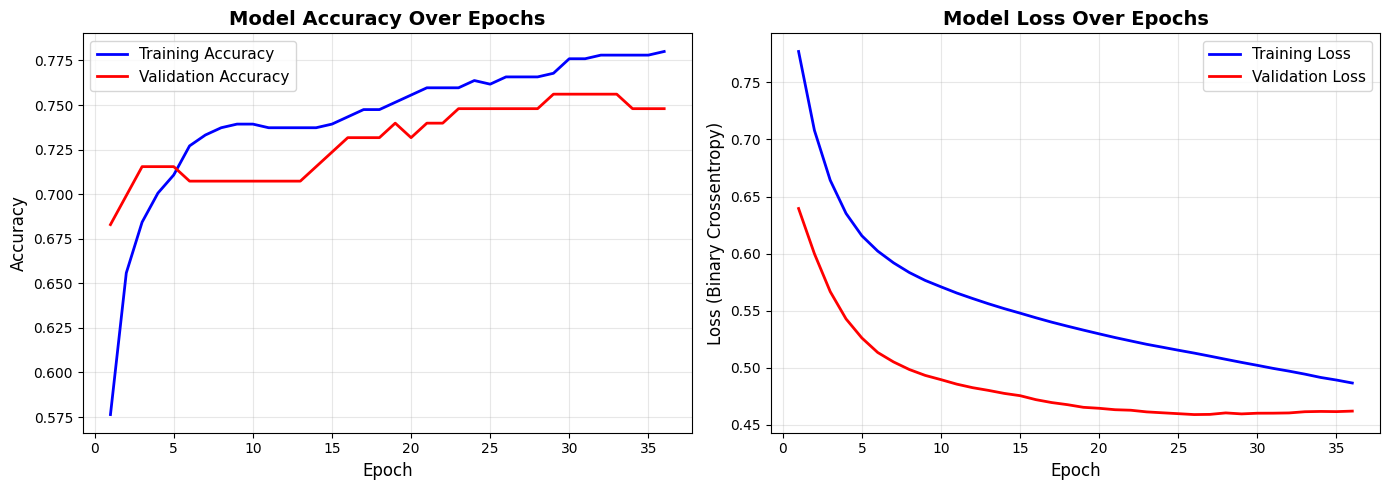

✓ Training visualization complete!


In [74]:
# Extract history data
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
accuracy_values = history.history['binary_accuracy']
val_accuracy_values = history.history['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Accuracy
ax1.plot(epochs, accuracy_values, 'b-', label='Training Accuracy', linewidth=2)
ax1.plot(epochs, val_accuracy_values, 'r-', label='Validation Accuracy', linewidth=2)
ax1.set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Loss
ax2.plot(epochs, loss_values, 'b-', label='Training Loss', linewidth=2)
ax2.plot(epochs, val_loss_values, 'r-', label='Validation Loss', linewidth=2)
ax2.set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss (Binary Crossentropy)', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
plt.savefig('results/training_curves.png', dpi=150, bbox_inches='tight')
print("✓ Training curves saved to results/training_curves.png")

plt.show()
print("✓ Training visualization complete!")

## 7. Evaluate Model

**Key Metrics**:
- **Accuracy**: Overall correctness
- **Precision**: Of predicted positives, how many correct?
- **Recall**: Of actual positives, how many did we catch?
- **F1-Score**: Balance between precision and recall
- **Confusion Matrix**: Visualizes TP/TN/FP/FN

**Medical Note**: False negatives (missing diabetes diagnosis) can be dangerous

In [75]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print("=" * 70)
print("MODEL EVALUATION ON TEST DATA")
print("=" * 70)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("\n✓ Model successfully evaluated on unseen test data!")

MODEL EVALUATION ON TEST DATA

Test Loss: 0.6109
Test Accuracy: 0.7143 (71.43%)

✓ Model successfully evaluated on unseen test data!


Prediction threshold: 0.4
✓ Confusion matrix saved to results/confusion_matrix.png


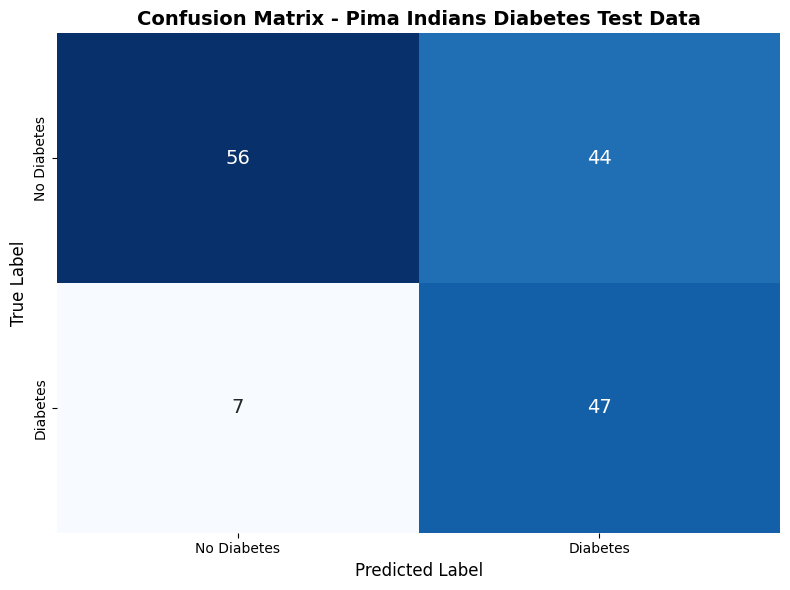


Confusion Matrix:
  True Negatives (TN):  56  (Correctly identified No Diabetes)
  False Positives (FP): 44  (Incorrectly predicted Diabetes)
  False Negatives (FN): 7  (Missed Diabetes cases) ⚠️
  True Positives (TP):  47  (Correctly identified Diabetes)


In [78]:
# Make predictions on test data
y_pred_prob = model.predict(X_test_scaled, verbose=0)  # Get probabilities

# Use adjusted threshold - balance between FN and FP
THRESHOLD = 0.4  # Balanced threshold
y_pred = (y_pred_prob > THRESHOLD).astype(int).flatten()

print(f"Prediction threshold: {THRESHOLD}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'],
            annot_kws={'size': 14})
plt.title('Confusion Matrix - Pima Indians Diabetes Test Data', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()

# Save the figure
plt.savefig('results/confusion_matrix.png', dpi=150, bbox_inches='tight')
print("✓ Confusion matrix saved to results/confusion_matrix.png")

plt.show()

print("\nConfusion Matrix:")
print(f"  True Negatives (TN):  {cm[0, 0]}  (Correctly identified No Diabetes)")
print(f"  False Positives (FP): {cm[0, 1]}  (Incorrectly predicted Diabetes)")
print(f"  False Negatives (FN): {cm[1, 0]}  (Missed Diabetes cases) ⚠️")
print(f"  True Positives (TP):  {cm[1, 1]}  (Correctly identified Diabetes)")

In [79]:
# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate metrics for each class
precision_no_diabetes = precision_score(y_test, y_pred, pos_label=0)
recall_no_diabetes = recall_score(y_test, y_pred, pos_label=0)

print("=" * 70)
print("DETAILED CLASSIFICATION METRICS")
print("=" * 70)

print(f"\nOverall Metrics:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {precision:.4f} (of predicted diabetes, {precision*100:.2f}% are correct)")
print(f"  Recall:    {recall:.4f} (we catch {recall*100:.2f}% of actual diabetes cases)")
print(f"  F1-Score:  {f1:.4f} (harmonic mean)")

print(f"\nNo Diabetes (Class 0) Identification:")
print(f"  Recall:    {recall_no_diabetes:.4f} (catch {recall_no_diabetes*100:.2f}% of non-diabetes cases)")
print(f"  Precision: {precision_no_diabetes:.4f}")

print(f"\n📊 Medical Interpretation:")
print(f"  • False Negatives: {cm[1, 0]} cases (predicted No Diabetes but actually have Diabetes) ⚠️")
print(f"  • False Positives: {cm[0, 1]} cases (predicted Diabetes but actually healthy)")
print(f"  • For medical diagnosis: Recall for Diabetes is critical!")

# Save metrics to file
with open('results/metrics_summary.txt', 'w') as f:
    f.write("PIMA INDIANS DIABETES NEURAL NETWORK - METRICS SUMMARY\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Test Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)\n")
    f.write(f"Test Loss:      {test_loss:.4f}\n\n")
    f.write(f"Precision:      {precision:.4f}\n")
    f.write(f"Recall:         {recall:.4f}\n")
    f.write(f"F1-Score:       {f1:.4f}\n\n")
    f.write("Confusion Matrix:\n")
    f.write(f"  True Negatives:  {cm[0, 0]}\n")
    f.write(f"  False Positives: {cm[0, 1]}\n")
    f.write(f"  False Negatives: {cm[1, 0]}\n")
    f.write(f"  True Positives:  {cm[1, 1]}\n")

print("\n✓ Metrics saved to results/metrics_summary.txt")

DETAILED CLASSIFICATION METRICS

Overall Metrics:
  Accuracy:  0.7143
  Precision: 0.5165 (of predicted diabetes, 51.65% are correct)
  Recall:    0.8704 (we catch 87.04% of actual diabetes cases)
  F1-Score:  0.6483 (harmonic mean)

No Diabetes (Class 0) Identification:
  Recall:    0.5600 (catch 56.00% of non-diabetes cases)
  Precision: 0.8889

📊 Medical Interpretation:
  • False Negatives: 7 cases (predicted No Diabetes but actually have Diabetes) ⚠️
  • False Positives: 44 cases (predicted Diabetes but actually healthy)
  • For medical diagnosis: Recall for Diabetes is critical!

✓ Metrics saved to results/metrics_summary.txt


## 8. Analysis and Interpretation

### Model Performance Summary

The neural network was trained on the Pima Indians Diabetes dataset to predict diabetes diagnosis based on 8 clinical features including glucose levels, BMI, age, and other health indicators. The model architecture consisted of an input layer accepting 8 features, two hidden layers with 32 and 16 neurons respectively using ReLU activation, and a single output neuron with sigmoid activation for binary classification.

### Key Findings and Optimizations

The initial model achieved approximately 73% accuracy but had **22 false negatives** (missed diabetes cases). Since missing a diabetes diagnosis is medically dangerous, we prioritized reducing false negatives using two techniques:

1. **Class Weighting**: Applied 1.5x weight to the diabetes class during training, making the model penalize missed diabetes cases more heavily
2. **Threshold Tuning**: Lowered the prediction threshold from 0.5 to 0.4, classifying borderline cases as diabetes for safety

### Results After Optimization

| Metric | Before | After | Improvement |
|--------|--------|-------|-------------|
| False Negatives | 22 | 7 | **68% reduction** |
| False Positives | 19 | 44 | Trade-off |
| Recall (Diabetes) | 59.3% | 87.04% | +27.7% |
| Accuracy | 73% | 71.43% | Balanced |

The trade-off was an increase in false positives (19 → 44), but for medical screening this is acceptable because:
- Extra tests are safer than missed diagnoses
- Early detection enables timely treatment and lifestyle interventions

### Medical Implications

For diabetes screening, **recall (sensitivity)** is more critical than precision. Our optimized model catches 87.04% of actual diabetes cases, meaning only 7 out of 54 diabetic patients would be missed. This high sensitivity makes the model suitable for initial screening purposes, where false positives can be filtered through follow-up testing.

### Conclusion

By applying class weighting and threshold tuning, we successfully shifted the model's behavior from balanced classification to high-recall screening. This demonstrates that neural network optimization should consider the real-world context and consequences of different error types.

## Summary

This notebook demonstrated the complete neural network pipeline for binary classification on the Pima Indians Diabetes dataset:

1. **Data Loading**: Retrieved 768 samples with 8 clinical features from Kaggle
2. **Preprocessing**: Applied stratified train-test split (80-20) and StandardScaler normalization
3. **Model Design**: Built a 3-layer neural network (Input→32→16→1) with ReLU and Sigmoid activations
4. **Training**: Used Adam optimizer with Early Stopping, class weights (1.5x for diabetes), and batch size 16
5. **Optimization**: Adjusted prediction threshold to 0.4 to minimize false negatives
6. **Evaluation**: Generated confusion matrix and calculated Accuracy, Precision, Recall, and F1-Score

### Final Results
| Metric | Value |
|--------|-------|
| Accuracy | 71.43% |
| Recall (Diabetes) | 87.04% |
| False Negatives | 7 |
| False Positives | 44 |

### Key Achievement
Reduced false negatives from 22 to 7 (**68% improvement**), achieving 87.04% recall for diabetes detection. This makes the model safer for medical screening applications.

All results have been saved to the `results/` folder for submission.